## Introduction ro tegression with Neural Network in TensorFlow

Predicting a numerical variable based on some other combination of variable , even shorter... predicting a number.

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.19.0


Createing data to view and fit

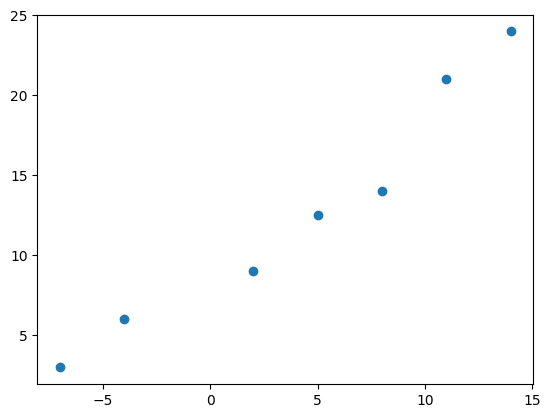

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
Y = np.array([3.0, 6.0, 9.0, 12.5, 14.0,21.0, 24.0])

# Visualize it
plt.scatter(X,Y);


### Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problems

house_info = tf.constant(["bedroom","bathroom", "garage"])

house_price = tf.constant([939500])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939500], dtype=int32)>)

In [4]:
X[0] , Y[0]

(np.float64(-7.0), np.float64(3.0))

In [5]:
input_shape = X[0].shape
output_shape = Y[0].shape

input_shape, output_shape

((), ())

In [6]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)

X,Y

(<tf.Tensor: shape=(7,), dtype=float64, numpy=array([-7., -4.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(7,), dtype=float64, numpy=array([ 3. ,  6. ,  9. , 12.5, 14. , 21. , 24. ])>)

In [7]:
input_shape = X[0].shape
output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

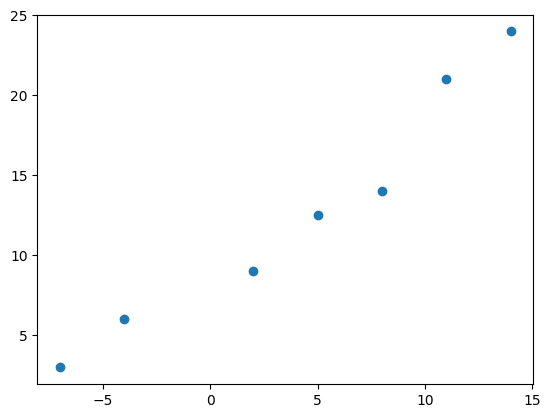

In [8]:
plt.scatter(X,Y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model
).
3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels

```
# This is formatted as code
```

)

In [9]:

# reshaping to 2D array so that it use Keras dimensional
X = tf.reshape(X, (-1, 1))
Y = tf.reshape(Y, (-1, 1))

X,Y




(<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[ 3. ],
        [ 6. ],
        [ 9. ],
        [12.5],
        [14. ],
        [21. ],
        [24. ]])>)

In [10]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae, # mae = short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X,Y, epochs=5)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.7005 - mae: 12.7005
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.5189 - mae: 12.5189
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.3372 - mae: 12.3372
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.1556 - mae: 12.1556
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.9740 - mae: 11.9740


In [11]:
# Chack out X And Y
X,Y

(<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[ 3. ],
        [ 6. ],
        [ 9. ],
        [12.5],
        [14. ],
        [21. ],
        [24. ]])>)

In [12]:
# Try and make a prediction using our model

#issue: Keras predict() doesn't accept Python lists directly. You need to convert it to a TensorFlow tensor or NumPy array

model.predict(tf.constant([[17.],[20]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


array([[3.9210768],
       [4.604208 ]], dtype=float32)

## How we improve a model

- we can improve our model, by altering the steps we took to create a model.

1. **Create a model** - here we might add more layers, increase the model of hidden units (all called ceurons)
within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [13]:
# let's update the mdoel

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"]
               )

model.fit(X,Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step - loss: 10.1647 - mae: 10.1647
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 9.9831 - mae: 9.9831
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 9.8015 - mae: 9.8015
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.6198 - mae: 9.6198
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 9.4382 - mae: 9.4382
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 9.2566 - mae: 9.2566
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 9.0749 - mae: 9.0749
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 8.8933 - mae: 8.8933
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 8.7117 - mae: 8.7117
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 8.5300 - mae: 8.5300
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 8.3484 - mae: 8.3484
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 8.1668 - mae: 8.1668
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [14]:
#
X,Y

(<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[ 3. ],
        [ 6. ],
        [ 9. ],
        [12.5],
        [14. ],
        [21. ],
        [24. ]])>)

In [15]:
#predictstion
model.predict(tf.constant([[17.],[20.]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[29.260834],
       [34.29594 ]], dtype=float32)

#### Let's see if we can make another to improve our model

In [16]:
# 1. create the model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
                             ])
# 2. Compile the model
model.compile(loss= "mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X,Y, epochs=100)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.7687 - mae: 11.7687
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.9761 - mae: 10.9761
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.1809 - mae: 10.1809
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.3809 - mae: 9.3809
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.5736 - mae: 8.5736
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.7565 - mae: 7.7565
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.9264 - mae: 6.9264
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.0797 - mae: 6.0797
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.2121 - mae: 5.2121
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 5.4692 - mae: 5.4692
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.0525 - mae: 6.0525
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.3327 - mae: 6.3327
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms

In [17]:
# X,Y

In [18]:
#predictstion of improved model

model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


array([[26.7332]], dtype=float32)

### Evaluting a model

In practice , a typical workflow you'll go through when building neural networks is :

Building a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ....


When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

* The data - what data are we working with ? what does it look like ?
* The model itself - what does our model look like ?
* The trianing of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [19]:
# Make a bigger dataset
X2 = tf.range(-100,100,5)

X2

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95], dtype=int32)>

In [20]:
Y2 = X2 +10
Y2

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105], dtype=int32)>

In [21]:
# reshaping to 2D array so that it use Keras dimensional
X2 = tf.reshape(X2, (-1, 1))
Y2 = tf.reshape(Y2, (-1, 1))


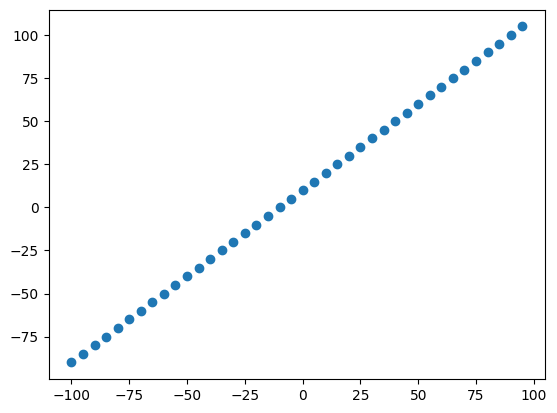

In [22]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X2,Y2)


### The 3 sets ....

* **Training set** - the model learns from this data, which is typically 70-80 % of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10 -15 % of the data available.
* **Test set** - the model get evaluated on this data to test what it has learned, this set is typically 10 - 15% of the toatal data available.

In [23]:
# Check the length of how many samples we have
len(X2)

40

In [24]:
# Split the data into train and test sets

X2_train = X2[:32] # first 32 are training samples data --80 % of it
Y2_train = Y2[:32]


X2_test = X2[32:] # last 8 sample which is the 20 %.
Y2_test = Y2[32:]

#len(X2_train),len(X2_test)
len(Y2_train),len(Y2_test)



(32, 8)

### Visualizing the data



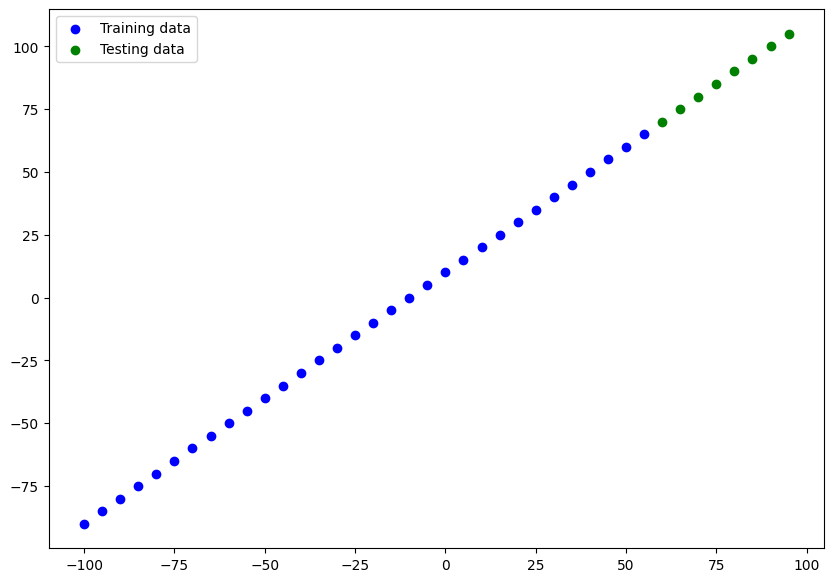

In [25]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X2_train, Y2_train, c ="b" , label = "Training data")

#plot test data in green
plt.scatter(X2_test, Y2_test, c= "g", label = "Testing data")

# show a legend
plt.legend();


In [26]:
# Let's have a look at how to build a neural network for data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])




Visualize the model

In [27]:
#model.summary()

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when we parameters from other models durin ***transfer learning***).

#### **Exercise**: Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters ( total and  trainable ) by calling model.summary().

In [28]:
# Let's fit our model to training data

# 3. Fit the model
model.fit(X2_train, Y2_train, epochs=100, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step - loss: 62.3628 - mae: 62.3628
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 44.0333 - mae: 44.0333
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 25.9478 - mae: 25.9478
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 9.8864 - mae: 9.8864
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 11.9606 - mae: 11.9606
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 7.6675 - mae: 7.6675
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 9.2022 - mae: 9.2022
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.8017 - mae: 10.8017
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 11.8622 - mae: 11.8622
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 7.6821 - mae: 7.6821
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.1037 - mae: 9.1037
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.9039 - mae: 10.9039
Epoch 13/100
1/1 ━━━━━━━━━━━

In [29]:
#model.summary()

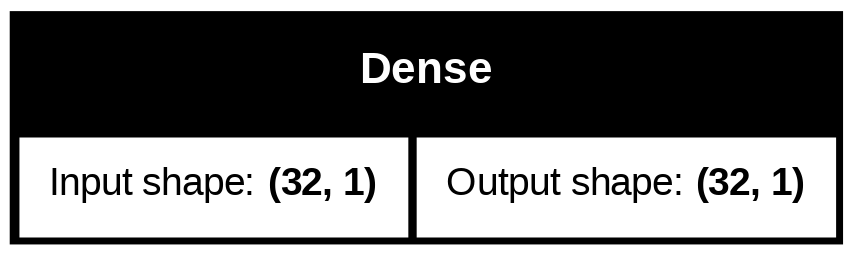

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model = model , show_shapes= True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'Y_test' or 'true' versus Y_pred (ground truth versus your model's predictions).

In [31]:
# Make some predictions
Y2_pred = model.predict(X2_test)
Y2_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


array([[ 66.27322 ],
       [ 71.73973 ],
       [ 77.20625 ],
       [ 82.67277 ],
       [ 88.13929 ],
       [ 93.605804],
       [ 99.07233 ],
       [104.53884 ]], dtype=float32)

In [32]:
Y2_test

<tf.Tensor: shape=(8, 1), dtype=int32, numpy=
array([[ 70],
       [ 75],
       [ 80],
       [ 85],
       [ 90],
       [ 95],
       [100],
       [105]], dtype=int32)>

In [33]:
# Lets create a plotting function
def plot_predictions(train_data = X2_train,
                     train_labels=Y2_train,
                     test_data = X2_test,
                     test_labels=Y2_test,
                     predictions=Y2_pred):
  """
  Plots training dats, test data and compares prediction to ground truth labels.

  """

  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="test data")

  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")

  # Show the legend
  plt.legend()



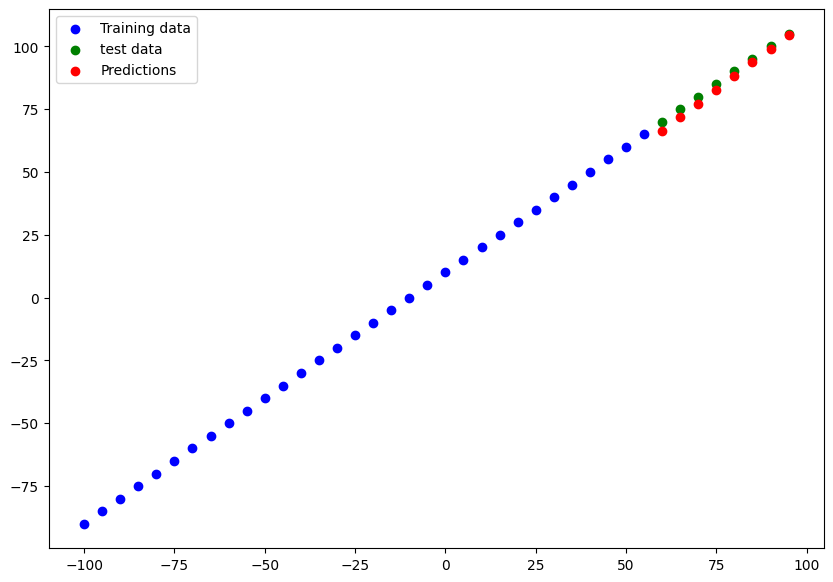

In [34]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics

Depending on problems, there will be different evaluation metrics to evaluate model's performance.

as this is regression , two of ht emain metrics:

* MAE- mean absolute error, "on average , how wrong is each of my model's predictions"

* MSE - mean square error, "square the average errors"


In [35]:
# Evaluate the model on the test
model.evaluate(X2_test,Y2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 2.0940 - mae: 2.0940


[2.0939712524414062, 2.0939712524414062]

In [36]:
# calculate the mean absolute error

#mae = tf.metrics.mean_absolute_error(y_true=Y2_test,
                               # y_pred = Y2_pred)

# mae -- this version does not exist in my tf version so i will use this

mae = tf.reduce_mean(tf.abs(Y2_test - Y2_pred)).numpy()
print(mae)

2


In [37]:
# calculate the mean square error

mse = tf.reduce_mean(tf.square(Y2_test - Y2_pred)).numpy()
mse
print(mse)


7


In [38]:
# Make some functions to reuse  MAE and MSE

def mae (y_true, y_pred):

  y_true = Y2_test

  return tf.reduce_mean(tf.abs(Y2_test - Y2_pred)).numpy()

def mse (y_true, y_pred):

  y_true = Y2_test

  return tf.reduce_mean(tf.square(Y2_test - Y2_pred)).numpy()



### Running experiements to improve our model

1. Get more data - get more examples for model to train on (more opportunities to learn patterens or relationship between features and labels).

2. Make model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 epochs



**Build model 1**

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X2_train, Y2_train, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - loss: 114.6289 - mae: 114.6289
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 96.0306 - mae: 96.0306
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 77.4784 - mae: 77.4784
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 59.1490 - mae: 59.1490
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 40.8218 - mae: 40.8218
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 23.1099 - mae: 23.1099
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.0598 - mae: 8.0598
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.5590 - mae: 10.5590
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.9480 - mae: 8.9480
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.0224 - mae: 12.0224
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.6290 - mae: 7.6290
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.2640 - mae: 9.2640
Epoch 13/100
1/1 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


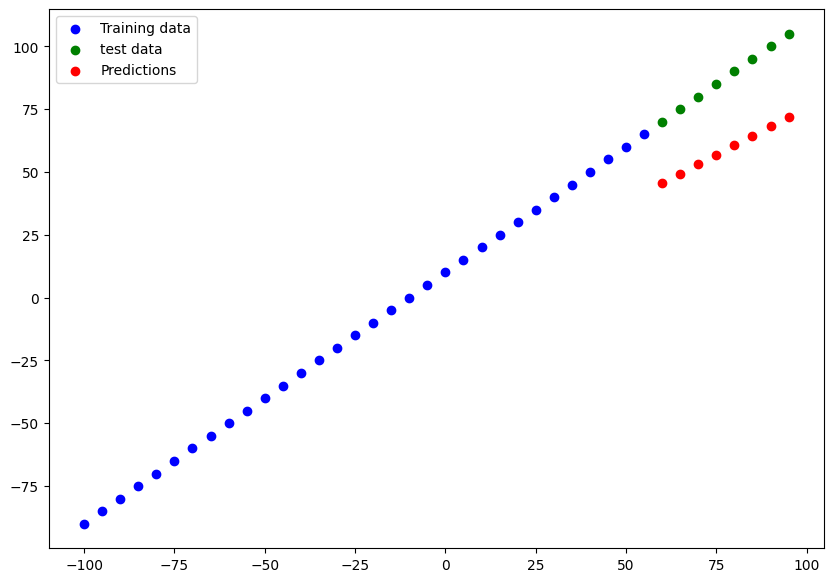

In [40]:
# Plot of predictions for model_1
Y2_pred_1 = model_1.predict(X2_test)

plot_predictions(predictions = Y2_pred_1)

In [41]:
# Calculate model_1 evaluation metrics

mae_1 = mae(Y2_test, Y2_pred_1)
mse_1 = mse(Y2_test, Y2_pred_1)
mae_1, mse_1,Y2_pred_1

(np.int32(2),
 np.int32(7),
 array([[45.62985 ],
        [49.377804],
        [53.12576 ],
        [56.873714],
        [60.621674],
        [64.36963 ],
        [68.117584],
        [71.86554 ]], dtype=float32))

### **Build** model_2
+ 2 dense layers, trained for 100 epochs

In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([

    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X2_train, Y2_train, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 31.8213 - mae: 31.8213
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 31.4668 - mae: 31.4668
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 31.1122 - mae: 31.1122
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 30.7574 - mae: 30.7574
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 30.4024 - mae: 30.4024
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 30.0472 - mae: 30.0472
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 29.6918 - mae: 29.6918
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 29.3362 - mae: 29.3362
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 28.9805 - mae: 28.9805
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 28.6245 - mae: 28.6245
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 28.2684 - mae: 28.2684
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 27.9120 - mae: 27.9120
Epoch 13/100
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


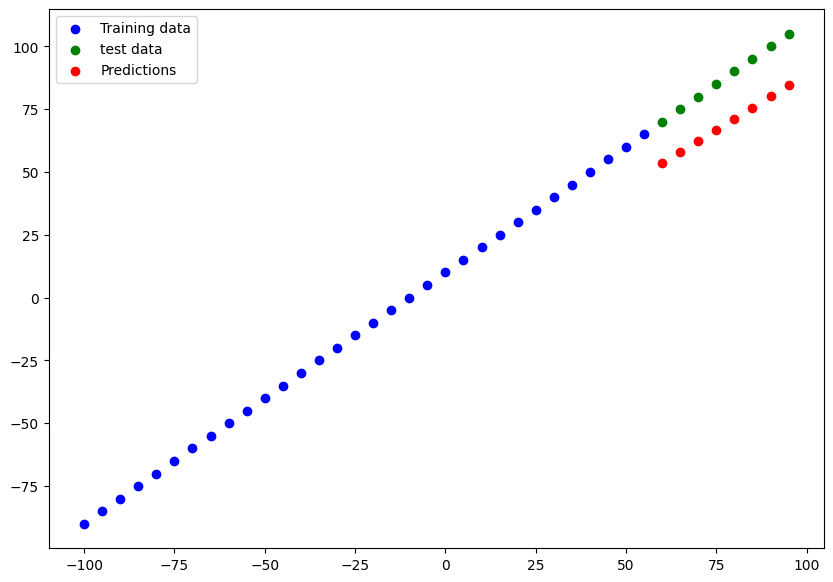

In [43]:
# Plot of predictions for model_2
Y2_pred_2 = model_2.predict(X2_test)

plot_predictions(predictions = Y2_pred_2)

In [44]:

mae_2 = mae(Y2_test, Y2_pred_2)
mse_2 = mse(Y2_test, Y2_pred_2)
mae_2, mse_2, Y2_pred_2

(np.int32(2),
 np.int32(7),
 array([[53.459522],
        [57.89434 ],
        [62.329144],
        [66.76395 ],
        [71.198746],
        [75.63356 ],
        [80.06837 ],
        [84.503174]], dtype=float32))

## Model 3

In [45]:
# Set the random seed
tf.random.set_seed(40)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

# 2.Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(X2_train, Y2_train, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 48.9625 - mse: 3284.5894
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 48.0458 - mse: 3161.2686
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 47.1288 - mse: 3040.3184
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 46.2114 - mse: 2921.7412
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 45.2935 - mse: 2805.5396
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 44.3751 - mse: 2691.7156
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 43.4563 - mse: 2580.2681
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 42.5370 - mse: 2471.1997
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 41.6172 - mse: 2364.5107
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 40.7044 - mse: 2260.2017
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 39.7980 - mse: 2158.3535
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 38.8916 - mse: 2058.9434
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


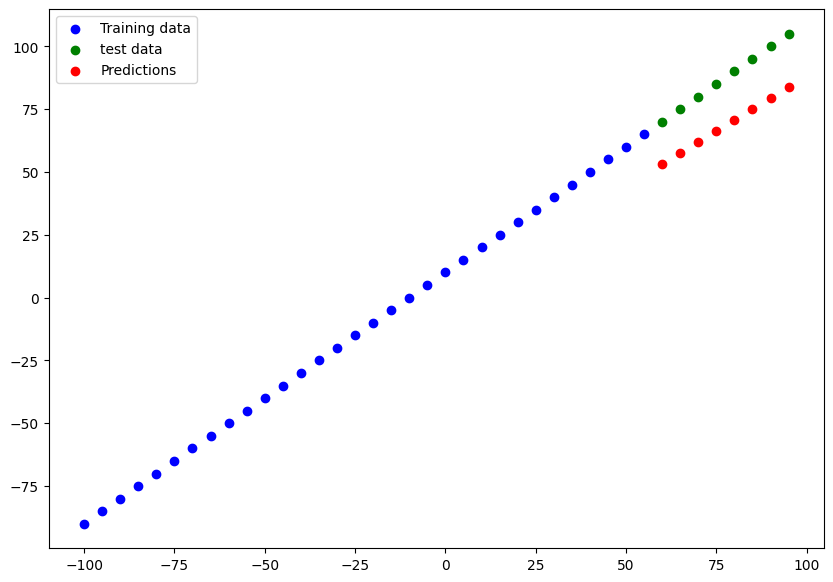

In [46]:
# Plot of predictions for model_2
Y2_pred_3 = model_3.predict(X2_test)

plot_predictions(predictions = Y2_pred_3)

In [47]:

mae_3 = mae(Y2_test, Y2_pred_3)
mse_3 = mse(Y2_test, Y2_pred_3)
mae_3, mse_3, Y2_pred_3

(np.int32(2),
 np.int32(7),
 array([[53.02849 ],
        [57.416485],
        [61.804474],
        [66.19248 ],
        [70.58049 ],
        [74.96847 ],
        [79.35647 ],
        [83.74446 ]], dtype=float32))

### Comparing the result of model experiments

In [48]:
# Let's compare our model's results using a pandas DataFrame

import pandas as pd

model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2" ,mae_2, mse_2],
    ["model_3" ,mae_3, mse_3]
    ]

all_result = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_result

,model,mae,mse
0,model_1,2,7
1,model_2,2,7
2,model_3,2,7


### A larger example of dataset



In [49]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [51]:
# Let's try one-hot encode out DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [52]:
# Create X & Y values (features and labels)
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [53]:
# View
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [54]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [55]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(x, y, test_size=0.2, random_state=42)

len(x), len(X3_train), len(X3_test),len(y)


(1338, 1070, 268, 1338)

In [56]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
# 3. Fit the model

insurance_model.fit(X3_train, y3_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 10188.6787 - mae: 10188.6787
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7672.6279 - mae: 7672.6279
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7746.6650 - mae: 7746.6650
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7749.2095 - mae: 7749.2095
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7542.5859 - mae: 7542.5859
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7745.3047 - mae: 7745.3047
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7654.1714 - mae: 7654.1714
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7441.9502 - mae: 7441.9502
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7591.8345 - mae: 7591.8345
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7362.2686 - mae: 7362.2686
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7543.8975 - mae: 7543.8975
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

In [57]:
# Check thr result of the isurance model on the test data

insurance_model.evaluate(X3_test, y3_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8036.0278 - mae: 8036.0278


[8004.1484375, 8004.1484375]

In [ ]:
y3_test.median(), y3_train.mean()

(8487.8803, np.float64(13346.089736364485))

Let's try improve our model
To (Try) improve out model, we'll run 3 experiments:
1. Add an extra layer with more hiden units
2. Train for longer
